In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def generate_temperature_data(days=365):
    np.random.seed(42)
    return np.random.normal(60, 15, days)  # Mean 60°F, std dev 15°F

def calculate_degree_days(temperatures, base_temp=65):
    hdd = np.maximum(base_temp - temperatures, 0)
    cdd = np.maximum(temperatures - base_temp, 0)
    return hdd, cdd

def estimate_energy_consumption(degree_days, building_factor=12000):
    return degree_days * building_factor  # BTU per degree day

def plot_results(temperatures, hdd, cdd):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
    days = np.arange(len(temperatures))
    ax1.plot(days, temperatures, label='Temperature')
    ax1.axhline(y=65, color='r', linestyle='--', label='Base Temperature')
    ax1.set_ylabel('Temperature (°F)')
    ax1.legend()
    ax2.bar(days, hdd, alpha=0.5, label='HDD')
    ax2.bar(days, cdd, alpha=0.5, label='CDD')
    ax2.set_xlabel('Day of Year')
    ax2.set_ylabel('Degree Days')
    ax2.legend()
    plt.tight_layout()
    plt.show()

In [5]:
np.arange(5)

array([0, 1, 2, 3, 4])

In [3]:
def main():
    temperatures = generate_temperature_data()
    hdd, cdd = calculate_degree_days(temperatures)
    heat_energy = estimate_energy_consumption(hdd)
    cool_energy = estimate_energy_consumption(cdd)
    
    print(f"Annual Heating Degree Days: {np.sum(hdd):.0f}")
    print(f"Annual Cooling Degree Days: {np.sum(cdd):.0f}")
    print(f"Estimated Heating Energy: {np.sum(heat_energy)/1e6:.1f} million BTU")
    print(f"Estimated Cooling Energy: {np.sum(cool_energy)/1e6:.1f} million BTU")
    print(f"Total Estimated Energy: {(np.sum(heat_energy) + np.sum(cool_energy))/1e6:.1f} million BTU")
    
    plot_results(temperatures, hdd, cdd)

Annual Heating Degree Days: 3036
Annual Cooling Degree Days: 1266
Estimated Heating Energy: 36.4 million BTU
Estimated Cooling Energy: 15.2 million BTU
Total Estimated Energy: 51.6 million BTU


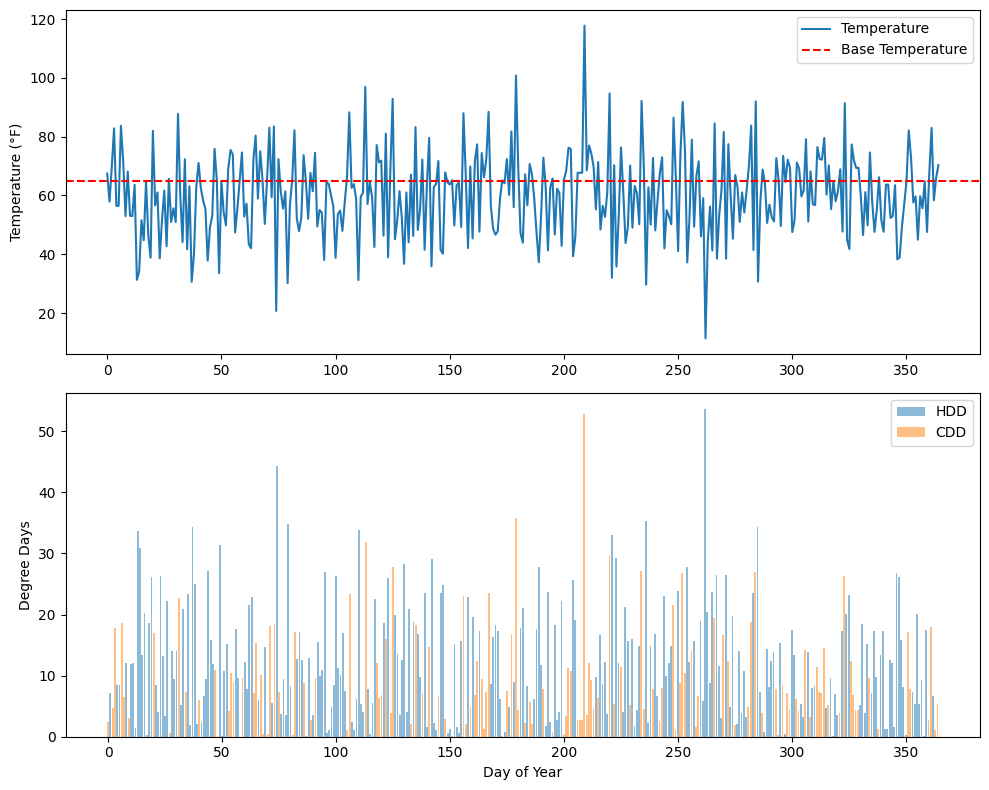

In [4]:
if __name__ == "__main__":
    main()